<a href="https://colab.research.google.com/github/ofchwan/Deep_Learning/blob/main/%08Chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 창시자에게 배우는 딥러닝
## 5. 머신 러닝의 기본  요소

### 5.1 일반화: 머신러닝의 목표
* 최적화(optimization)와 일반화(generalization)
  * 최적화(optimization) : 가능한 훈련 데이터에서 최고의 성능을 얻으려고 모델을 조절하는 과정
  * 일반화(generalization) : 훈련된 모델이 이전에 본 적 없는 데이터에서 얼마나 잘 수행되는지


  <img src = "https://drive.google.com/uc?export=view&id=1j3rpPNANLVPisWcehrcTNUERZUMusJY6" height = 300 width = 500>

### 5.4 일반화 성능 향상하기

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), _ = imdb.load_data(num_words = 10000)

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

history_original = model.fit(train_data, train_labels, epochs = 20, batch_size = 512, validation_split = 0.4)

17464789/17464789 [==============================] - 1s 0us/step
Epoch 1/20
30/30 [==============================] - 8s 65ms/step - loss: 0.5394 - accuracy: 0.7828 - val_loss: 0.4191 - val_accuracy: 0.8626
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3434 - accuracy: 0.8885 - val_loss: 0.3265 - val_accuracy: 0.8744
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2517 - accuracy: 0.9152 - val_loss: 0.2843 - val_accuracy: 0.8902
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2018 - accuracy: 0.9312 - val_loss: 0.2803 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1688 - accuracy: 0.9428 - val_loss: 0.2817 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1451 - accuracy: 0.9522 - val_loss: 0.2856 - val_accuracy: 0.8873
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1223 - accurac

In [2]:
# 더 작은 용량의 모델

model = keras.Sequential([
    layers.Dense(4, activation = 'relu'),
    layers.Dense(4, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

history_smaller_model = model.fit(train_data, train_labels, epochs = 20, batch_size = 512, validation_split = 0.4)

Epoch 1/20
30/30 [==============================] - 3s 87ms/step - loss: 0.5637 - accuracy: 0.7772 - val_loss: 0.4618 - val_accuracy: 0.8550
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3936 - accuracy: 0.8881 - val_loss: 0.3749 - val_accuracy: 0.8725
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3088 - accuracy: 0.9084 - val_loss: 0.3409 - val_accuracy: 0.8709
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2562 - accuracy: 0.9234 - val_loss: 0.2972 - val_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2192 - accuracy: 0.9321 - val_loss: 0.2894 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1910 - accuracy: 0.9415 - val_loss: 0.2795 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1700 - accuracy: 0.9487 - val_loss: 0.2728 - val_accuracy: 0.8903
Epoch 8/20
30

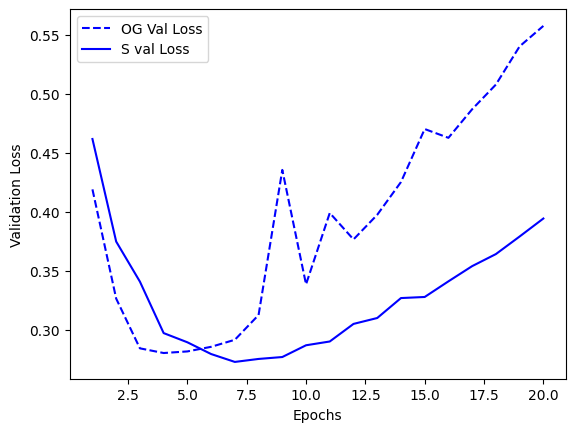

In [3]:
import matplotlib.pyplot as plt

original_model_val_loss = history_original.history['val_loss']
smaller_model_val_loss = history_smaller_model.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, original_model_val_loss, 'b--', label = 'OG Val Loss')
plt.plot(epochs, smaller_model_val_loss, 'b', label = 'S val Loss')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [4]:
# 더 큰 용량의 모델

model = keras.Sequential([
    layers.Dense(512, activation = 'relu'),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

history_larger_model = model.fit(train_data, train_labels, epochs = 20, batch_size = 512, validation_split = 0.4)

Epoch 1/20
30/30 [==============================] - 5s 77ms/step - loss: 0.5725 - accuracy: 0.7131 - val_loss: 0.3905 - val_accuracy: 0.8308
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3363 - accuracy: 0.8622 - val_loss: 0.2883 - val_accuracy: 0.8848
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2467 - accuracy: 0.9043 - val_loss: 0.2731 - val_accuracy: 0.8887
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1862 - accuracy: 0.9309 - val_loss: 0.2949 - val_accuracy: 0.8776
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1407 - accuracy: 0.9457 - val_loss: 0.2907 - val_accuracy: 0.8861
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0896 - accuracy: 0.9691 - val_loss: 0.8079 - val_accuracy: 0.7634
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1077 - accuracy: 0.9622 - val_loss: 0.3233 - val_accuracy: 0.8850
Epoch 8/20
30

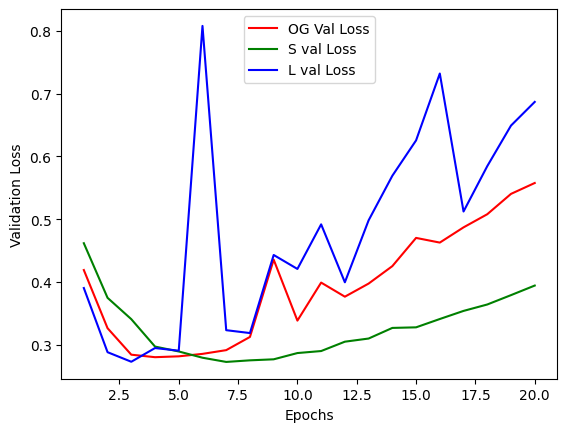

In [6]:
original_model_val_loss = history_original.history['val_loss']
smaller_model_val_loss = history_smaller_model.history['val_loss']
larger_model_val_loss = history_larger_model.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, original_model_val_loss, 'r', label = 'OG Val Loss')
plt.plot(epochs, smaller_model_val_loss, 'g', label = 'S val Loss')
plt.plot(epochs, larger_model_val_loss, 'b', label = 'L val Loss')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
#plt.ylim(0.2, 0.7)
plt.show()

In [7]:
# Regularization(가중치 규제) - L2

from tensorflow.keras import regularizers

# regularizers.l2(0.002) --> weight decay
model = keras.Sequential([
    layers.Dense(16, kernel_regularizer = regularizers.l2(0.002), activation = 'relu'),
    layers.Dense(16, kernel_regularizer = regularizers.l2(0.002), activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

history_l2_reg = model.fit(train_data, train_labels, epochs = 20, batch_size = 512, validation_split = 0.4)

Epoch 1/20
30/30 [==============================] - 4s 89ms/step - loss: 0.6157 - accuracy: 0.7774 - val_loss: 0.4825 - val_accuracy: 0.8598
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4151 - accuracy: 0.8885 - val_loss: 0.4164 - val_accuracy: 0.8685
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3390 - accuracy: 0.9097 - val_loss: 0.3786 - val_accuracy: 0.8799
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3022 - accuracy: 0.9243 - val_loss: 0.3636 - val_accuracy: 0.8858
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2779 - accuracy: 0.9311 - val_loss: 0.3922 - val_accuracy: 0.8738
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2617 - accuracy: 0.9403 - val_loss: 0.3641 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2509 - accuracy: 0.9419 - val_loss: 0.4344 - val_accuracy: 0.8601
Epoch 8/20
30

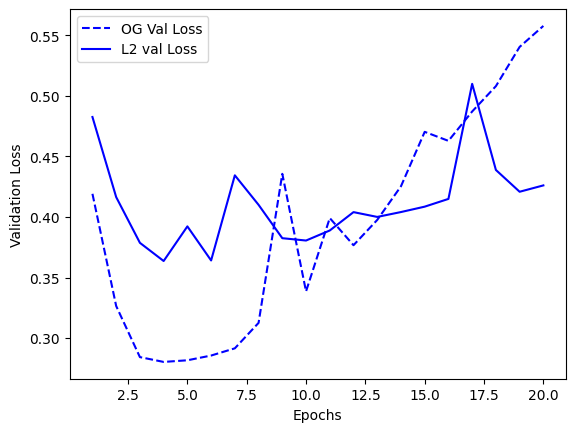

In [8]:
original_model_val_loss = history_original.history['val_loss']
l2_reg_model_val_loss = history_l2_reg.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, original_model_val_loss, 'b--', label = 'OG Val Loss')
plt.plot(epochs, l2_reg_model_val_loss, 'b', label = 'L2 val Loss')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [9]:
# Regularization(가중치 규제) - L1

from tensorflow.keras import regularizers

# regularizers.l2(0.002) --> weight decay
model = keras.Sequential([
    layers.Dense(16, kernel_regularizer = regularizers.l1(0.001), activation = 'relu'),
    layers.Dense(16, kernel_regularizer = regularizers.l1(0.001), activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

history_l1_reg = model.fit(train_data, train_labels, epochs = 20, batch_size = 512, validation_split = 0.4)

Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 1.1687 - accuracy: 0.6825 - val_loss: 0.7564 - val_accuracy: 0.7307
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6990 - accuracy: 0.8152 - val_loss: 0.6741 - val_accuracy: 0.8433
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6347 - accuracy: 0.8439 - val_loss: 0.6231 - val_accuracy: 0.8563
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5962 - accuracy: 0.8553 - val_loss: 0.6063 - val_accuracy: 0.8452
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.5806 - accuracy: 0.8563 - val_loss: 0.5837 - val_accuracy: 0.8493
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.5656 - accuracy: 0.8609 - val_loss: 0.5730 - val_accuracy: 0.8559
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5567 - accuracy: 0.8637 - val_loss: 0.5627 - val_accuracy: 0.8620
Epoch 8/20
30

In [10]:
# Regularization(가중치 규제) - L1 + L2

from tensorflow.keras import regularizers

# regularizers.l2(0.002) --> weight decay
model = keras.Sequential([
    layers.Dense(16, kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001), activation = 'relu'),
    layers.Dense(16, kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001), activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

history_l1l2_reg = model.fit(train_data, train_labels, epochs = 20, batch_size = 512, validation_split = 0.4)

Epoch 1/20
30/30 [==============================] - 3s 62ms/step - loss: 1.1611 - accuracy: 0.7303 - val_loss: 0.7803 - val_accuracy: 0.7403
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.6927 - accuracy: 0.8311 - val_loss: 0.6893 - val_accuracy: 0.8217
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6414 - accuracy: 0.8420 - val_loss: 0.6382 - val_accuracy: 0.8430
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6061 - accuracy: 0.8561 - val_loss: 0.6014 - val_accuracy: 0.8579
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5855 - accuracy: 0.8617 - val_loss: 0.6043 - val_accuracy: 0.8483
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5696 - accuracy: 0.8613 - val_loss: 0.5813 - val_accuracy: 0.8567
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.5584 - accuracy: 0.8654 - val_loss: 0.5773 - val_accuracy: 0.8538
Epoch 8/20
30

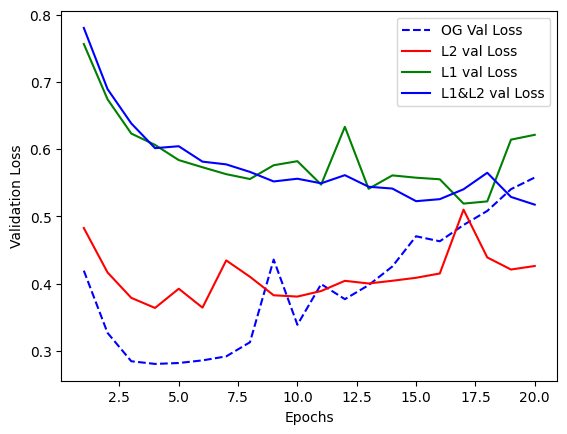

In [11]:
original_model_val_loss = history_original.history['val_loss']
l2_reg_model_val_loss = history_l2_reg.history['val_loss']
l1_reg_model_val_loss = history_l1_reg.history['val_loss']
l1l2_reg_model_val_loss = history_l1l2_reg.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, original_model_val_loss, 'b--', label = 'OG Val Loss')
plt.plot(epochs, l2_reg_model_val_loss, 'r', label = 'L2 val Loss')
plt.plot(epochs, l1_reg_model_val_loss, 'g', label = 'L1 val Loss')
plt.plot(epochs, l1l2_reg_model_val_loss, 'b', label = 'L1&L2 val Loss')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [12]:
# 드롭아웃(dropout)

model = keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(16, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

history_dropout_model = model.fit(train_data, train_labels, epochs = 20, batch_size = 512, validation_split = 0.4)

Epoch 1/20
30/30 [==============================] - 4s 76ms/step - loss: 0.6341 - accuracy: 0.6305 - val_loss: 0.5198 - val_accuracy: 0.8264
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5100 - accuracy: 0.7731 - val_loss: 0.4153 - val_accuracy: 0.8706
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4208 - accuracy: 0.8349 - val_loss: 0.3336 - val_accuracy: 0.8834
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3615 - accuracy: 0.8699 - val_loss: 0.3034 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3146 - accuracy: 0.8934 - val_loss: 0.2817 - val_accuracy: 0.8914
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2776 - accuracy: 0.9109 - val_loss: 0.2737 - val_accuracy: 0.8919
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2472 - accuracy: 0.9229 - val_loss: 0.2795 - val_accuracy: 0.8942
Epoch 8/20
30

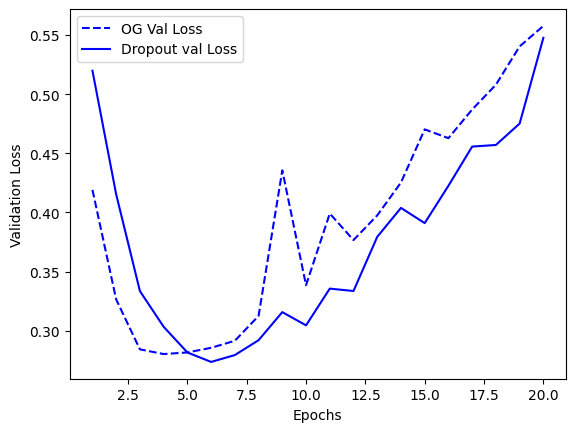

In [13]:
original_model_val_loss = history_original.history['val_loss']
dropout_model_val_loss = history_dropout_model.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, original_model_val_loss, 'b--', label = 'OG Val Loss')
plt.plot(epochs, dropout_model_val_loss, 'b', label = 'Dropout val Loss')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

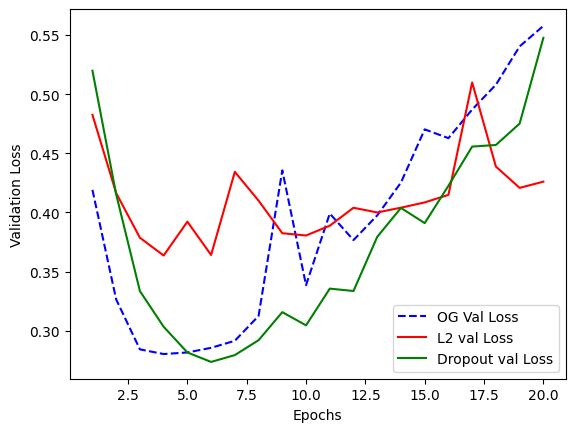

In [14]:
original_model_val_loss = history_original.history['val_loss']
l2_reg_model_val_loss = history_l2_reg.history['val_loss']
# l1_reg_model_val_loss = history_l1_reg.history['val_loss']
# l1l2_reg_model_val_loss = history_l1l2_reg.history['val_loss']
dropout_model_val_loss = history_dropout_model.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, original_model_val_loss, 'b--', label = 'OG Val Loss')
plt.plot(epochs, l2_reg_model_val_loss, 'r', label = 'L2 val Loss')
# plt.plot(epochs, l1_reg_model_val_loss, 'g', label = 'L1 val Loss')
# plt.plot(epochs, l1l2_reg_model_val_loss, 'b', label = 'L1&L2 val Loss')
plt.plot(epochs, dropout_model_val_loss, 'g', label = 'Dropout val Loss')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [15]:
# l2 + dropout


model = keras.Sequential([
    layers.Dense(16, kernel_regularizer = regularizers.l2(0.002), activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(16, kernel_regularizer = regularizers.l2(0.002), activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

history_l2dropout_model = model.fit(train_data, train_labels, epochs = 20, batch_size = 512, validation_split = 0.4)

Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.7293 - accuracy: 0.6311 - val_loss: 0.6290 - val_accuracy: 0.8465
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.6105 - accuracy: 0.7474 - val_loss: 0.5347 - val_accuracy: 0.8460
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5300 - accuracy: 0.7999 - val_loss: 0.4364 - val_accuracy: 0.8792
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4706 - accuracy: 0.8352 - val_loss: 0.4003 - val_accuracy: 0.8741
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4215 - accuracy: 0.8611 - val_loss: 0.3702 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3945 - accuracy: 0.8767 - val_loss: 0.3507 - val_accuracy: 0.8904
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3719 - accuracy: 0.8939 - val_loss: 0.3501 - val_accuracy: 0.8820
Epoch 8/20
30

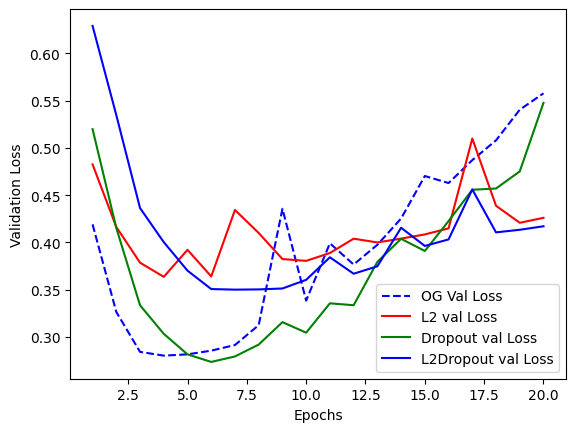

In [17]:
original_model_val_loss = history_original.history['val_loss']
l2_reg_model_val_loss = history_l2_reg.history['val_loss']
# l1_reg_model_val_loss = history_l1_reg.history['val_loss']
# l1l2_reg_model_val_loss = history_l1l2_reg.history['val_loss']
dropout_model_val_loss = history_dropout_model.history['val_loss']
l2dropout_model_val_loss = history_l2dropout_model.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, original_model_val_loss, 'b--', label = 'OG Val Loss')
plt.plot(epochs, l2_reg_model_val_loss, 'r', label = 'L2 val Loss')
# plt.plot(epochs, l1_reg_model_val_loss, 'g', label = 'L1 val Loss')
# plt.plot(epochs, l1l2_reg_model_val_loss, 'b', label = 'L1&L2 val Loss')
plt.plot(epochs, dropout_model_val_loss, 'g', label = 'Dropout val Loss')
plt.plot(epochs, l2dropout_model_val_loss, 'b', label = 'L2Dropout val Loss')


plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()